<a href="https://colab.research.google.com/github/GRACOPORDEUS/atividades_mestrado/blob/main/1107055_220414_ordenacao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt

from google.colab import drive
import os

In [9]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
dir = '/content/gdrive/MyDrive/instancias_num/'

insts = os.listdir('./gdrive/MyDrive/instancias_num/')

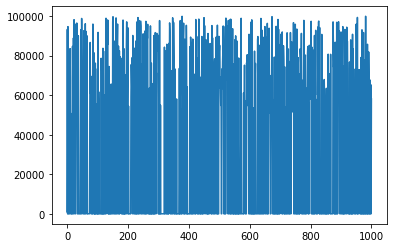

1001

In [14]:
arr = np.loadtxt(dir + insts[3])

plt.plot(arr)
plt.show()
len(arr)

Counting Sort

In [16]:
def count_sort(arr):
    max = int(np.max(arr))
    min = int(np.min(arr))
    n = max - min + 1

    C = [0] * n
    B = [0] * len(arr)

    for i in range(0, len(arr)):
        C[arr[i]- min] += 1
  
    for i in range(1, len(C)):
        C[i] += C[i-1]
  
    for i in range(len(arr)-1, -1, -1):
        B[C[arr[i] - min] - 1] = arr[i]
        C[arr[i] - min] -= 1

    for i in range(0, len(arr)):
        arr[i] = B[i]
  
    return arr

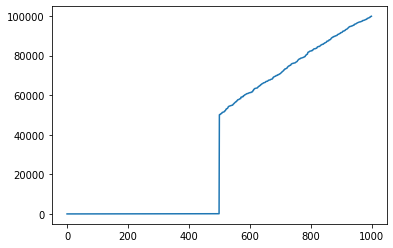

O tempo de execução foi: 0:00:00.017784


In [17]:
instancia = dir + insts[3]

arr = pd.read_csv(instancia).values.flatten()
start = datetime.now()
count_sort(arr)
end = datetime.now()

plt.plot(arr)
plt.show()
print('O tempo de execução foi:',end - start)

Radix Sort

In [18]:
def radix_sort(arr):
    max1 = np.max(arr)
    exp = 1

    while max1 / exp > 1:
        count_sort(arr)
        exp *= 10

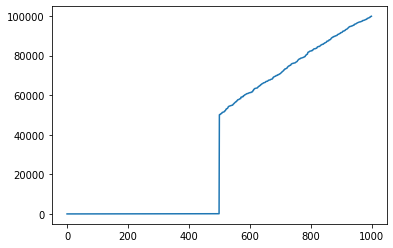

O tempo de execução foi: 0:00:00.338290


In [21]:
instancia = dir + insts[3]

arr = pd.read_csv(instancia).values.flatten()
start = datetime.now()
radix_sort(arr)
end = datetime.now()

plt.plot(arr)
plt.show()
print('O tempo de execução foi:',end - start)

Bucket Sort

In [43]:
def insertion_sort(A):
  for i in range(1, len(A)):
    chave = A[i]
    j = i - 1
    while j >= 0 and A[j] > chave:
      A[j+1] = A[j]
      j = j - 1
    A[j+1] = chave
  return A

def bucket_sort(arr):
    bucket = []

    for i in range(len(arr)):
        bucket.append([])

    for j in arr:
        index_b = int(10 * j)
        bucket[index_b].append(j)

    for i in range(len(arr)):
        bucket[i] = insertion_sort(bucket[i])

    k = 0
    for i in range(len(arr)):
        for j in range(len(bucket[i])):
            arr[k] = bucket[i][j]
            k += 1
    return arr

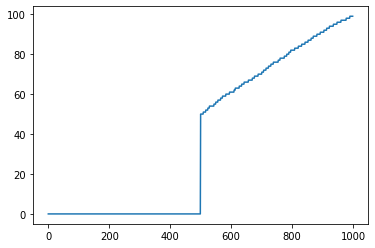

O tempo de execução foi: 0:00:00.015899


In [45]:
instancia = dir + insts[3]

arr = pd.read_csv(instancia).values.flatten()
arr = np.trunc(arr/1000)

start = datetime.now()
bucket_sort(arr)
end = datetime.now()

plt.plot(arr)
plt.show()
print('O tempo de execução foi:',end - start)